In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'data/e2eGPU_DP_execeution_time_results.xlsx', sheet_name='Sheet2')
print(data)

    Nstates  RTX 2070 @ 64tpb  RTX 8000 @ 64 tpb  V100 @ 32 tpb         CPU
0     20000          0.292670           0.263432       0.417210     59.6021
1     80000          0.625637           0.512374       0.677465    240.7920
2    180000          1.007030           0.781941       0.910950    548.2540
3    320000          1.516090           1.154170       1.164690    971.2940
4    500000          2.248790           1.647120       1.564850   1525.1400
5    720000          3.105320           2.215880       2.050100   2204.1100
6    980000          4.280930           2.965440       2.675190   2989.3100
7   1280000          5.892490           3.829250       3.427330   3911.6500
8   1620000          7.861660           5.164780       4.602660   4961.1200
9   2000000         10.013700           6.901050       6.278950   6147.4000
10  2420000         12.072100           8.657990       7.507980   7409.7300
11  2880000         14.280800          10.458200       8.944360   8797.4900
12  3380000 

In [3]:
Nstates = data.Nstates.values
rtx_2070 = data.iloc[:,1].values
rtx_8000 = data.iloc[:,2].values
v100 = data.iloc[:,3].values
cpu = data.iloc[:,4].values



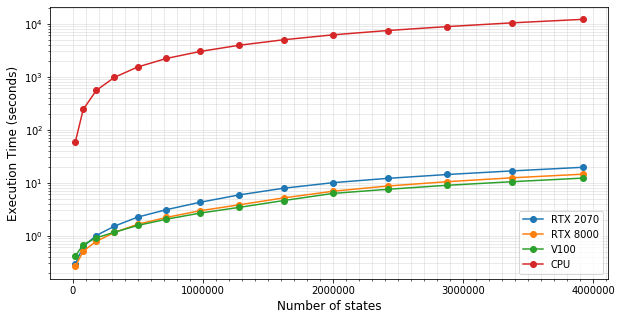

<Figure size 432x288 with 0 Axes>

In [9]:


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

minor_xticks = np.arange(0,1e7, 1e5)
minor_yticks = np.arange(0, 1e5, 1e3)
major_xticks = np.arange(0,1e7, 1e6)
major_yticks = np.arange(0, 1e5, 1e4)

ax.set_xticks(minor_xticks, minor=True)
ax.set_xticks(major_xticks, minor=False)
ax.set_yticks(major_yticks, minor=False)
ax.set_yticks(minor_yticks, minor=True)

ax.grid(b= True, which='both', color='#CCCCCC', axis='both',linestyle = '-', alpha = 0.5)
# ax.tick_params(axis='both', which='both', labelsize=6)

ax.set_xlabel('Number of states', fontsize = 'large')
ax.set_ylabel('Execution Time (seconds)', fontsize = 'large')

plt.semilogy(Nstates, rtx_2070, 'o-', label='RTX 2070')
plt.semilogy(Nstates, rtx_8000, 'o-', label='RTX 8000' )
plt.semilogy(Nstates, v100, 'o-', label='V100')
plt.semilogy(Nstates, cpu, 'o-', label='CPU')
plt.legend()

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

plt.savefig("Execution_Time",bbox_inches = "tight", dpi=300)

# plt.cla()
plt.close(fig)

In [5]:
speedup_rtx_2070 = np.divide(cpu,rtx_2070)
speedup_rtx_8000 = np.divide(cpu,rtx_8000)
speedup_v100 = np.divide(cpu,v100)
print(speedup_rtx_2070)
print(speedup_rtx_8000)
# speedup_rtx_2070

[203.64950285 384.87493547 544.42668044 640.65721692 678.20472343
 709.78514292 698.2851857  663.83651054 631.05247492 613.89895843
 613.7896472  616.03621646 619.9038686  617.09640882]
[ 226.25231559  469.95358859  701.1449713   841.55193776  925.94346496
  994.68834052 1008.04939571 1021.51857413  960.56753627  890.79198093
  855.8256593   841.20498747  836.32531434  832.15381638]


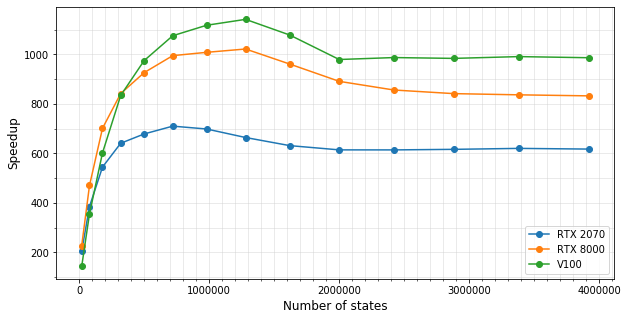

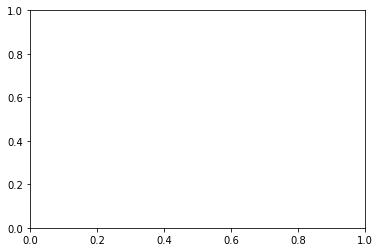

In [10]:


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

minor_xticks = np.arange(0,1e7, 1e5)
minor_yticks = np.arange(0, 1200, 100)
major_xticks = np.arange(0,1e7, 1e6)
major_yticks = np.arange(0, 1200, 200)

ax.set_xticks(minor_xticks, minor=True)
ax.set_xticks(major_xticks, minor=False)
ax.set_yticks(major_yticks, minor=False)
ax.set_yticks(minor_yticks, minor=True)

ax.grid(b= True, which='both', color='#CCCCCC', axis='both',linestyle = '-', alpha = 0.5)
# ax.tick_params(axis='both', which='both', labelsize=6)

ax.set_xlabel('Number of states', fontsize = 'large')
ax.set_ylabel('Speedup', fontsize = 'large')

plt.plot(Nstates, speedup_rtx_2070, 'o-', label='RTX 2070')
plt.plot(Nstates, speedup_rtx_8000, 'o-', label='RTX 8000' )
plt.plot(Nstates, speedup_v100, 'o-', label='V100')
plt.legend()
plt.show()


# plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("Speedup",bbox_inches = "tight", dpi=300)

# plt.cla()
plt.close(fig)